In [5]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("C:\\Users\\Nithin\\OneDrive\\Desktop\\Customers.csv")
transactions = pd.read_csv("C:\\Users\\Nithin\\OneDrive\\Desktop\\Transactions.csv")

# Merge the datasets on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID')
# Calculate total spending per customer
total_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)

# Calculate frequency of transactions per customer
transaction_frequency = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_frequency.rename(columns={'TransactionID': 'TransactionFrequency'}, inplace=True)

# Calculate average transaction value per customer
average_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean().reset_index()
average_transaction_value.rename(columns={'TotalValue': 'AverageTransactionValue'}, inplace=True)

# Merge these features into a single dataframe
customer_features = pd.merge(total_spending, transaction_frequency, on='CustomerID')
customer_features = pd.merge(customer_features, average_transaction_value, on='CustomerID')

# Optionally, add customer profile information (e.g., Region)
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID')

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\a

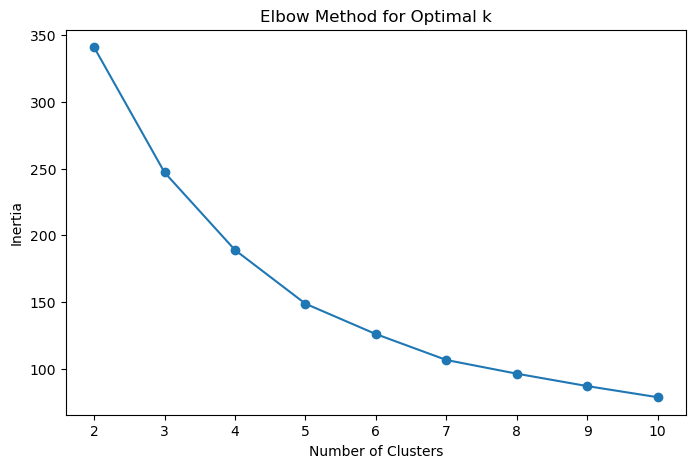

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpending', 'TransactionFrequency', 'AverageTransactionValue']])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [7]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 0.8393610671357156
Silhouette Score: 0.36484538478474426


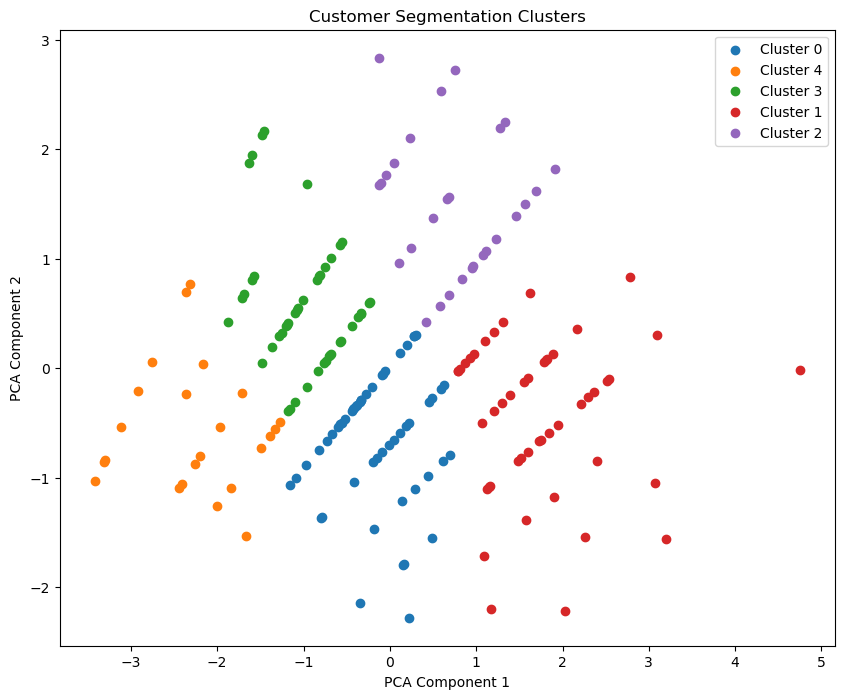

In [9]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add PCA components to the dataframe
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in customer_features['Cluster'].unique():
    plt.scatter(customer_features[customer_features['Cluster'] == cluster]['PCA1'],
                customer_features[customer_features['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Clusters')
plt.legend()
plt.show()